### Importing data

In [81]:
import numpy as np
import pandas as pd 
import plotly.express as px
import plotly.graph_objects as go
data=pd.read_csv("A:\\Data Science by Excelr\\PROJECT\\bankruptcy_prevention.csv",sep=";")
data.sample(5)

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
38,1.0,1.0,0.0,0.5,0.0,0.5,bankruptcy
146,0.5,0.5,0.5,1.0,0.5,0.0,non-bankruptcy
98,1.0,1.0,0.0,0.0,0.0,0.0,bankruptcy
243,0.0,1.0,1.0,1.0,1.0,0.0,non-bankruptcy
90,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


### Label Encoding for class(target)

In [82]:
data['Bankruptcy'] = [
    1 if typ == 'bankruptcy' else 0 for typ in data[' class']
]
data.sample(5)

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class,Bankruptcy
149,0.5,1.0,1.0,0.5,1.0,1.0,non-bankruptcy,0
123,1.0,1.0,0.5,0.5,1.0,1.0,non-bankruptcy,0
204,0.0,0.5,0.5,1.0,1.0,1.0,non-bankruptcy,0
161,0.5,0.5,0.0,1.0,1.0,0.5,non-bankruptcy,0
158,0.5,1.0,0.5,0.5,1.0,0.0,non-bankruptcy,0


### Splitting into features and a target

In [83]:
features=data.columns[0:6]
X=data[features]
y=data['Bankruptcy']

### Splitting into train and test data

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train,y_train

(     industrial_risk   management_risk   financial_flexibility   credibility  \
 228              1.0               1.0                     1.0           0.5   
 85               0.5               0.5                     0.0           0.0   
 112              0.5               0.5                     1.0           1.0   
 148              1.0               0.5                     1.0           1.0   
 171              0.0               1.0                     0.0           1.0   
 ..               ...               ...                     ...           ...   
 137              0.0               1.0                     1.0           1.0   
 72               1.0               0.5                     1.0           0.5   
 140              1.0               0.0                     0.5           1.0   
 235              0.5               0.5                     1.0           0.5   
 37               1.0               1.0                     0.0           0.0   
 
       competitiveness   o

### Using Standard scalar for better performance on Neural Networks

In [85]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled

array([[ 1.17422957,  0.94822374,  1.47772983,  0.06611766,  0.0113235 ,
         1.04253923],
       [-0.04892623, -0.29943908, -0.94477809, -1.13602165, -1.12102613,
         1.04253923],
       [-0.04892623, -0.29943908,  1.47772983,  1.26825697,  1.14367312,
        -0.10310828],
       ...,
       [ 1.17422957, -1.5471019 ,  0.26647587,  1.26825697,  0.0113235 ,
        -1.24875578],
       [-0.04892623, -0.29943908,  1.47772983,  0.06611766,  0.0113235 ,
        -0.10310828],
       [ 1.17422957,  0.94822374, -0.94477809, -1.13602165, -1.12102613,
         1.04253923]])

### Creating Neural Network layers.
#### We have used Adam optimizer, loss func as Binary Crossentropy, Activation fn as Relu for all layers and Sigmoid for the Output layer and Metrics as Accuracy, precision and Recall.

In [73]:
import tensorflow as tf
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(lr=0.01),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)
history = model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
7/7 [==============================] - 1s 3ms/step - loss: 0.2395 - accuracy: 0.8700 - precision: 0.8519 - recall: 0.8313
Epoch 2/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0462 - accuracy: 0.9900 - precision: 0.9880 - recall: 0.9880
Epoch 3/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0615 - accuracy: 0.9900 - precision: 0.9765 - recall: 1.0000
Epoch 4/100
7/7 [==============================] - 0s 2ms/step - loss: 0.0036 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000
Epoch 5/100
7/7 [==============================] - 0s 2ms/step - loss: 4.0367e-04 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000
Epoch 6/100
7/7 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000
Epoch 7/100
7/7 [==============================] - 0s 2ms/step - loss: 3.5013e-07 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000
Epoch 8/100
7/7 [==============================] - 0s 

### Plotting the Evaluation Metrics w.r.t No. of Epochs

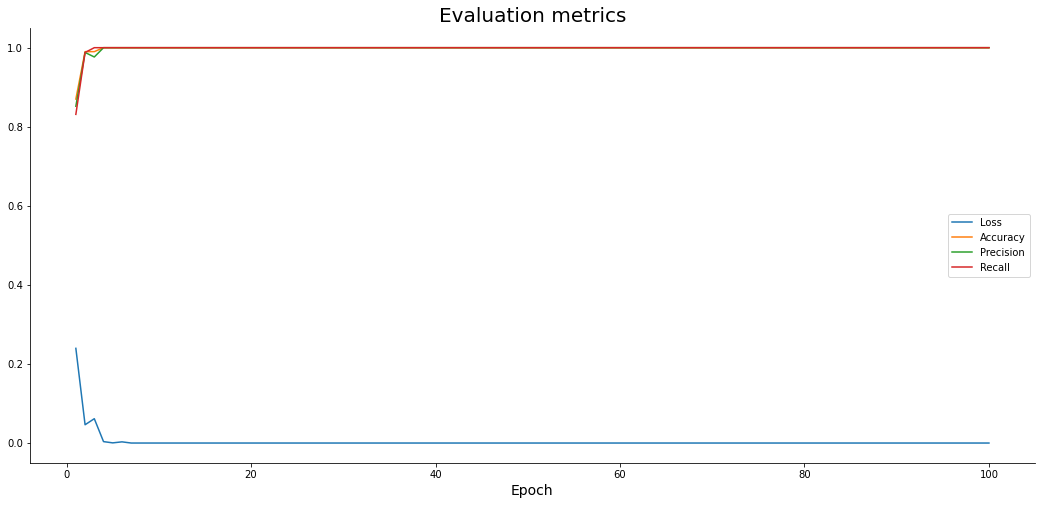

In [79]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
plt.plot(
    np.arange(1, 101), 
    history.history['loss'], label='Loss'
)
plt.plot(
    np.arange(1, 101), 
    history.history['accuracy'], label='Accuracy'
)
plt.plot(
    np.arange(1, 101), 
    history.history['precision'], label='Precision'
)
plt.plot(
    np.arange(1, 101), 
    history.history['recall'], label='Recall'
)
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

#### From graph we can see that the Neural network has reached maximum accuracy, precision and recall with the lowest loss.
***

### Now predicting to check whether our model has been overfitted.

In [80]:
predictions = model.predict(X_test_scaled)
predictions

array([[1.0000000e+00],
       [4.1659865e-21],
       [7.5509640e-11],
       [4.4066224e-15],
       [1.0000000e+00],
       [4.0109317e-21],
       [1.0000000e+00],
       [7.9553237e-22],
       [2.0911139e-24],
       [1.0000000e+00],
       [1.2380881e-10],
       [4.5987324e-13],
       [4.0109317e-21],
       [2.1789174e-29],
       [7.3940786e-14],
       [1.0000000e+00],
       [4.5987324e-13],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.6167647e-22],
       [1.0000000e+00],
       [1.0000000e+00],
       [2.8325033e-07],
       [1.0494197e-14],
       [7.7278234e-21],
       [1.5764460e-16],
       [2.4104499e-24],
       [1.0000000e+00],
       [1.6944050e-07],
       [1.6846254e-27],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.9014795e-06],
       [9.1463549e-16],
       [7.5509640e-11],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [7.3765251e-11],
       [3.0966701e-26],
       [1.000000

In [34]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

ROC_AUC Score :  1.0
Function for ROC_AUC Score :  1.0
Threshold value is: 1.0


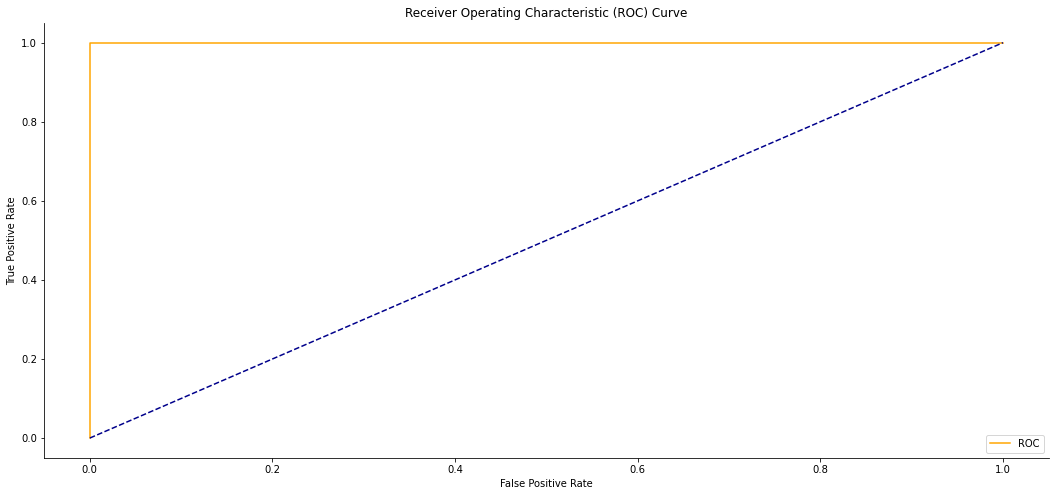

In [35]:
# Computing manually fpr, tpr, thresholds and roc auc 
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)
print("ROC_AUC Score : ",roc_auc)
print("Function for ROC_AUC Score : ",roc_auc_score(y_test, predictions)) # Function present
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Threshold value is:", optimal_threshold)
plot_roc_curve(fpr, tpr)

In [36]:
np.ravel(predictions)

array([5.0021260e-23, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
       0.0000000e+00, 2.8150011e-13, 0.0000000e+00, 1.1828232e-22,
       1.0000000e+00, 1.0000000e+00, 0.0000000e+00, 7.2197361e-07,
       3.5336215e-19, 3.0055941e-15, 1.0000000e+00, 4.8026205e-35,
       4.1009471e-09, 1.0000000e+00, 1.9371696e-38, 1.0000000e+00,
       1.1897959e-16, 1.0000000e+00, 7.5014761e-20, 1.0000000e+00,
       1.8684146e-25, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 6.4943808e-15, 1.8684074e-25, 1.0000000e+00,
       7.3433903e-31, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
       1.0000000e+00, 0.0000000e+00, 3.5701983e-30, 1.2858655e-27,
       0.0000000e+00, 1.0000000e+00, 7.2197156e-07, 1.3886990e-26,
       7.5015052e-20, 1.0000000e+00, 9.5681040e-21, 1.0000000e+00,
       1.8684146e-25, 1.0000000e+00], dtype=float32)

In [39]:
prediction_classes = [
    1 if prob >= optimal_threshold else 0 for prob in np.ravel(predictions)
]
prediction_classes

[0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1]

In [40]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, prediction_classes))

[[29  0]
 [ 0 21]]


In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print(f'Accuracy: {accuracy_score(y_test, prediction_classes):.2f}')
print(f'Precision: {precision_score(y_test, prediction_classes):.2f}')
print(f'Recall: {recall_score(y_test, prediction_classes):.2f}')

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
